Equal-Weights-MC Value Function with 1000 episodes
{InventoryState(on_hand=0, on_order=0): -35.495,
 InventoryState(on_hand=0, on_order=1): -27.89,
 InventoryState(on_hand=0, on_order=2): -28.34,
 InventoryState(on_hand=1, on_order=0): -28.952,
 InventoryState(on_hand=1, on_order=1): -29.386,
 InventoryState(on_hand=2, on_order=0): -30.42}
True Value Function
{InventoryState(on_hand=0, on_order=0): -35.511,
 InventoryState(on_hand=0, on_order=1): -27.932,
 InventoryState(on_hand=0, on_order=2): -28.345,
 InventoryState(on_hand=1, on_order=0): -28.932,
 InventoryState(on_hand=1, on_order=1): -29.345,
 InventoryState(on_hand=2, on_order=0): -30.345}
Decaying-Learning-Rate-MC Value Function with 1000 episodes
{InventoryState(on_hand=0, on_order=0): -35.537,
 InventoryState(on_hand=0, on_order=1): -28.561,
 InventoryState(on_hand=0, on_order=2): -28.431,
 InventoryState(on_hand=1, on_order=0): -28.956,
 InventoryState(on_hand=1, on_order=1): -29.566,
 InventoryState(on_hand=2, on_order=0):

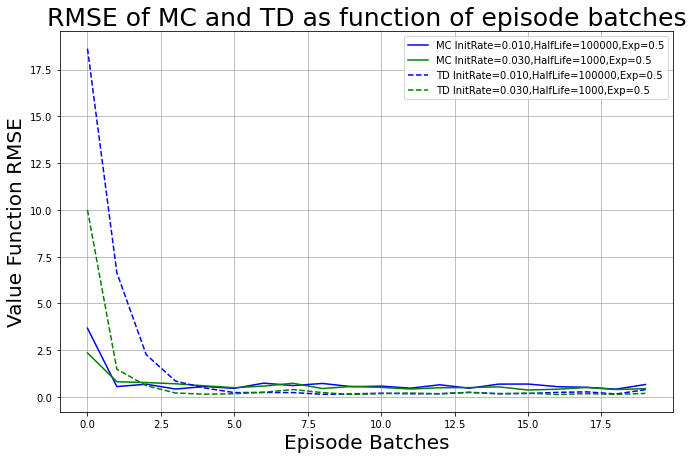

In [5]:
from typing import Sequence, Tuple, Mapping
from rl.chapter2.simple_inventory_mrp import SimpleInventoryMRPFinite
from rl.chapter2.simple_inventory_mrp import InventoryState
from rl.chapter10.prediction_utils import (
    mc_finite_equal_wts_correctness,
    mc_finite_learning_rate_correctness,
    td_finite_learning_rate_correctness,
    compare_td_and_mc
)


capacity: int = 2
poisson_lambda: float = 1.0
holding_cost: float = 1.0
stockout_cost: float = 10.0

si_mrp: SimpleInventoryMRPFinite = SimpleInventoryMRPFinite(
    capacity=capacity,
    poisson_lambda=poisson_lambda,
    holding_cost=holding_cost,
    stockout_cost=stockout_cost
)
initial_vf_dict: Mapping[InventoryState, float] = \
    {s: 0. for s in si_mrp.non_terminal_states}

gamma: float = 0.9
mc_episode_length_tol: float = 1e-6
num_episodes = 1000

td_episode_length: int = 100
initial_learning_rate: float = 0.03
half_life: float = 1000.0
exponent: float = 0.5
mc_finite_equal_wts_correctness(
    fmrp=si_mrp,
    gamma=gamma,
    tolerance=mc_episode_length_tol,
    num_episodes=num_episodes,
    initial_vf_dict=initial_vf_dict
)
mc_finite_learning_rate_correctness(
    fmrp=si_mrp,
    gamma=gamma,
    tolerance=mc_episode_length_tol,
    num_episodes=num_episodes,
    initial_learning_rate=initial_learning_rate,
    half_life=half_life,
    exponent=exponent,
    initial_vf_dict=initial_vf_dict
)
td_finite_learning_rate_correctness(
    fmrp=si_mrp,
    gamma=gamma,
    episode_length=td_episode_length,
    num_episodes=num_episodes,
    initial_learning_rate=initial_learning_rate,
    half_life=half_life,
    exponent=exponent,
    initial_vf_dict=initial_vf_dict
)

plot_batch: int = 50
plot_start: int = 0
learning_rates: Sequence[Tuple[float, float, float]] = \
    [(0.01, 100000, 0.5), (0.03, 1000, 0.5)]

compare_td_and_mc(
    fmrp=si_mrp,
    gamma=gamma,
    mc_episode_length_tol=mc_episode_length_tol,
    num_episodes=num_episodes,
    learning_rates=learning_rates,
    initial_vf_dict=initial_vf_dict,
    plot_batch=plot_batch,
    plot_start=plot_start
)
